In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from tqdm import tqdm
import torchvision

# Create an instance of ResNet-18
ResNet18 = torchvision.models.resnet18()

# Print the model architecture
print(ResNet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define transformations for the dataset

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.247, 0.243, 0.261]),
])

# Download and prepare CIFAR-10 dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# Define loss function and optimizer
counter = 0
lr=0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ResNet18.parameters(), lr=0.05, momentum=0.9, weight_decay=5e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

ResNet18 = ResNet18.to(device)
# Training the model
num_epochs = 60

for epoch in range(num_epochs):
    ResNet18.train()
    running_loss = 0.0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)


        optimizer.zero_grad()
        outputs = ResNet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Update the learning rate if using a scheduler
    if scheduler is not None:
        scheduler.step()

    # Print training loss
    print(f'Training Loss: {running_loss / len(train_loader)}')

    # Validation
    ResNet18.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = ResNet18(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Validation Accuracy: {100 * accuracy:.2f}%')
    counter = counter +1

# Save the trained model
torch.save(ResNet18.state_dict(), 'resnet18_cifar10.pth')


cuda
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.34it/s]

Training Loss: 1.9766124237823486


Validation Accuracy: 46.28%


Epoch 2/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.04it/s]

Training Loss: 1.5074544829559327


Validation Accuracy: 51.25%


Epoch 3/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.84it/s]

Training Loss: 1.318749213256836


Validation Accuracy: 55.31%


Epoch 4/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.07it/s]

Training Loss: 1.2348833780479431


Validation Accuracy: 61.65%


Epoch 5/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.91it/s]

Training Loss: 1.1858160156536102


Validation Accuracy: 62.27%


Epoch 6/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.32it/s]

Training Loss: 1.1625105388736725


Validation Accuracy: 57.86%


Epoch 7/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.08it/s]

Training Loss: 1.1354413851165772


Validation Accuracy: 63.14%


Epoch 8/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.21it/s]

Training Loss: 1.112127215089798


Validation Accuracy: 60.52%


Epoch 9/60: 100%|██████████| 3125/3125 [01:01<00:00, 50.76it/s]

Training Loss: 1.1022278302574158


Validation Accuracy: 62.99%


Epoch 10/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.27it/s]

Training Loss: 1.0899033927059174


Validation Accuracy: 62.68%


Epoch 11/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.10it/s]

Training Loss: 1.086646972913742


Validation Accuracy: 63.77%


Epoch 12/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.09it/s]

Training Loss: 1.0734891777467728


Validation Accuracy: 63.92%


Epoch 13/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.03it/s]

Training Loss: 1.068421691160202


Validation Accuracy: 62.72%


Epoch 14/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.28it/s]

Training Loss: 1.0674907561969758


Validation Accuracy: 63.99%


Epoch 15/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.34it/s]

Training Loss: 1.0649471815490723


Validation Accuracy: 66.30%


Epoch 16/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.27it/s]

Training Loss: 1.0567876781845094


Validation Accuracy: 64.51%


Epoch 17/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.41it/s]

Training Loss: 1.0571435588312148


Validation Accuracy: 63.03%


Epoch 18/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.14it/s]

Training Loss: 1.0601880688476562


Validation Accuracy: 62.58%


Epoch 19/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.06it/s]

Training Loss: 1.05668010389328


Validation Accuracy: 63.83%


Epoch 20/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.24it/s]

Training Loss: 1.0569656065750122


Validation Accuracy: 62.03%


Epoch 21/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.29it/s]

Training Loss: 1.0458975579071046


Validation Accuracy: 61.92%


Epoch 22/60: 100%|██████████| 3125/3125 [01:00<00:00, 51.80it/s]

Training Loss: 1.0446914655303956


Validation Accuracy: 63.38%


Epoch 23/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.92it/s]

Training Loss: 1.047840348882675


Validation Accuracy: 65.53%


Epoch 24/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.78it/s]

Training Loss: 1.0422314301776885


Validation Accuracy: 63.49%


Epoch 25/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.16it/s]

Training Loss: 1.0369608126306533


Validation Accuracy: 66.60%


Epoch 26/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.06it/s]

Training Loss: 1.0484063547229767


Validation Accuracy: 61.56%


Epoch 27/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.12it/s]

Training Loss: 1.0343398996829987


Validation Accuracy: 66.53%


Epoch 28/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.09it/s]

Training Loss: 1.0462282779216767


Validation Accuracy: 65.50%


Epoch 29/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.89it/s]

Training Loss: 1.0349773087310792


Validation Accuracy: 60.88%


Epoch 30/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.92it/s]

Training Loss: 1.0404830271053314


Validation Accuracy: 65.22%


Epoch 31/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.03it/s]

Training Loss: 1.0328588378524781


Validation Accuracy: 58.81%


Epoch 32/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.30it/s]

Training Loss: 1.0359456893634795


Validation Accuracy: 66.17%


Epoch 33/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.14it/s]

Training Loss: 1.0332102323532104


Validation Accuracy: 60.70%


Epoch 34/60: 100%|██████████| 3125/3125 [01:00<00:00, 51.40it/s]

Training Loss: 1.038216607875824


Validation Accuracy: 65.95%


Epoch 35/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.39it/s]

Training Loss: 1.0452927340126037


Validation Accuracy: 64.63%


Epoch 36/60: 100%|██████████| 3125/3125 [00:57<00:00, 53.97it/s]

Training Loss: 1.0379857345867156


Validation Accuracy: 63.46%


Epoch 37/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.08it/s]

Training Loss: 1.043867834854126


Validation Accuracy: 62.42%


Epoch 38/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.39it/s]

Training Loss: 1.0352630514621735


Validation Accuracy: 63.45%


Epoch 39/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.11it/s]

Training Loss: 1.0351752658557891


Validation Accuracy: 66.01%


Epoch 40/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.81it/s]

Training Loss: 1.0394946646261216


Validation Accuracy: 65.42%


Epoch 41/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.89it/s]

Training Loss: 1.0304426628303527


Validation Accuracy: 64.59%


Epoch 42/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.30it/s]

Training Loss: 1.033836536254883


Validation Accuracy: 65.55%


Epoch 43/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.40it/s]

Training Loss: 1.0329228066444398


Validation Accuracy: 65.79%


Epoch 44/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.05it/s]

Training Loss: 1.0376638624191283


Validation Accuracy: 65.25%


Epoch 45/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.85it/s]

Training Loss: 1.0327891554927826


Validation Accuracy: 65.18%


Epoch 46/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.82it/s]

Training Loss: 1.0342002371120453


Validation Accuracy: 65.20%


Epoch 47/60: 100%|██████████| 3125/3125 [00:59<00:00, 52.73it/s]

Training Loss: 1.0248509596776962


Validation Accuracy: 63.02%


Epoch 48/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.43it/s]

Training Loss: 1.0327096448802948


Validation Accuracy: 64.34%


Epoch 49/60: 100%|██████████| 3125/3125 [00:57<00:00, 53.99it/s]

Training Loss: 1.0383483551979065


Validation Accuracy: 66.15%


Epoch 50/60: 100%|██████████| 3125/3125 [00:57<00:00, 53.96it/s]

Training Loss: 1.0266229364681243


Validation Accuracy: 65.80%


Epoch 51/60: 100%|██████████| 3125/3125 [00:57<00:00, 53.97it/s]

Training Loss: 0.6260371868562699


Validation Accuracy: 78.52%


Epoch 52/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.19it/s]

Training Loss: 0.5068920870614052


Validation Accuracy: 78.90%


Epoch 53/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.88it/s]

Training Loss: 0.4392897087395191


Validation Accuracy: 78.70%


Epoch 54/60: 100%|██████████| 3125/3125 [00:57<00:00, 53.90it/s]

Training Loss: 0.38554656650722025


Validation Accuracy: 78.84%


Epoch 55/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.32it/s]

Training Loss: 0.35301457812070847


Validation Accuracy: 77.88%


Epoch 56/60: 100%|██████████| 3125/3125 [00:57<00:00, 54.36it/s]

Training Loss: 0.33125210842847824


Validation Accuracy: 77.55%


Epoch 57/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.87it/s]

Training Loss: 0.317283981294632


Validation Accuracy: 77.39%


Epoch 58/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.73it/s]

Training Loss: 0.2978815242096782


Validation Accuracy: 75.69%


Epoch 59/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.28it/s]

Training Loss: 0.2894442753997445


Validation Accuracy: 77.32%


Epoch 60/60: 100%|██████████| 3125/3125 [00:58<00:00, 53.02it/s]

Training Loss: 0.2749150009135157


Validation Accuracy: 76.37%


In [16]:
pip install grad-cam

In [17]:
from torchvision import models
import numpy as np
import cv2
import PIL

In [18]:
from pytorch_grad_cam import GradCAM,GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image,preprocess_image

In [34]:
ResNet18.eval()
# fix target class label (of the Imagenet class of interest!)
targets = [ClassifierOutputTarget(1)]

# fix the target layer (after which we'd like to generate the CAM)
target_layers = [ResNet18.layer2]

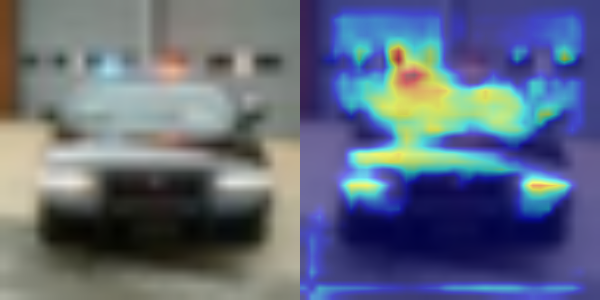

In [30]:
# instantiate the model
cam = GradCAM(model=ResNet18, target_layers=target_layers) # use GradCamPlusPlus class

image_path = test_dataset.data[66]
# Preprocess input image, get the input image tensor
img = np.array(PIL.Image.fromarray(image_path))
img = cv2.resize(img, (300,300))
img = np.float32(img) / 255
input_tensor = preprocess_image(img)
input_tensor = input_tensor.to(device)

# generate CAM
grayscale_cams = cam(input_tensor=input_tensor, targets=(targets))
cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)

cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])

# display the original image & the associated CAM
images = np.hstack((np.uint8(255*img), cam_image))
PIL.Image.fromarray(images)